# Product tagging using Machine Learning

---

In [1]:
# Data processing
import pandas as pd
import numpy as np
from collections import Counter

# Visualisation
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Language processing
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
# nltk.download('stopwords') # if you haven't downloaded this yet, you need to now.


# Machine Learning - model training
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.svm import LinearSVC, SVC

from sklearn.multiclass import OneVsRestClassifier

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Loading dataset

In [2]:
filepath = '/Users/wolfsinem/product-tagging/data/flipkart_com-ecommerce_sample.csv'
df = pd.read_csv((filepath))

In [9]:
df.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
model_df = df[['product_name','description']]

In [5]:
model_df.shape

(20000, 2)

### Adding a new column 'tags' 

In [6]:
pd.options.mode.chained_assignment = None 
model_df['tags'] = ""

In [7]:
model_df

,product_name,description,tags
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,
...,...,...,...
19995,WallDesign Small Vinyl Sticker,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,
19996,Wallmantra Large Vinyl Stickers Sticker,Buy Wallmantra Large Vinyl Stickers Sticker fo...,
19997,Elite Collection Medium Acrylic Sticker,Buy Elite Collection Medium Acrylic Sticker fo...,
19998,Elite Collection Medium Acrylic Sticker,Buy Elite Collection Medium Acrylic Sticker fo...,


#### Set all strings to lowercase

In [10]:
df['product_name'].str.lower()
df['description'].str.lower()

0        key features of alisha solid women's cycling s...
1        fabhomedecor fabric double sofa bed (finish co...
2        key features of aw bellies sandals wedges heel...
3        key features of alisha solid women's cycling s...
4        specifications of sicons all purpose arnica do...
                               ...                        
19995    buy walldesign small vinyl sticker for rs.730 ...
19996    buy wallmantra large vinyl stickers sticker fo...
19997    buy elite collection medium acrylic sticker fo...
19998    buy elite collection medium acrylic sticker fo...
19999    buy elite collection medium acrylic sticker fo...
Name: description, Length: 20000, dtype: object

In [11]:
test_string = model_df['description'][0]
test_string

"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts"

### Function to create tags

In [12]:
def tokenize_string(sentence):  
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    new_words = tokenizer.tokenize(sentence)
    new_words = [token.lower() for token in new_words] # set to a lower case
    
    stop_words = set(stopwords.words('english')) 
    manual_filtered_words = {'details','fabric','key','features','sales','number','contents','type','general', 'specifications'}

    filtered_sentence = [w for w in new_words if not w in stop_words and not w in manual_filtered_words]
    count_terms = Counter(filtered_sentence).most_common(10) # fill e.g. (5) for most common 5 terms
    return [item[0] for item in count_terms] # this function extracts the first element of each sublist, so only the terms and not how many times it occured

#### Generating tags with the above function

In [13]:
term_lists = tokenize_string(test_string)
term_lists

['shorts',
 'solid',
 'women',
 'cycling',
 'alisha',
 'cotton',
 'lycra',
 'navy',
 '3',
 'red']

As you can see there are some numbers being used as tags. We will take these out.

#### Now we need to for-loop this so the function generates tags for each of the comments

In [ ]:
# this function takes out every number within a string because we don't need it as tags since it doesnt give any context
# print([x for x in token_lists[] if not any(c.isdigit() for c in x)])

In [14]:
token_lists = []
for i in model_df['description']:
    token_lists.append([x for x in tokenize_string(str((i))) if not any(c.isdigit() for c in x)])

In [15]:
token_lists

[['shorts',
  'solid',
  'women',
  'cycling',
  'alisha',
  'cotton',
  'lycra',
  'navy',
  'red'],
 ['product',
  'sofa',
  'color',
  'bed',
  'warranty',
  'material',
  'avoid',
  'double',
  'black',
  'finish'],
 ['aw',
  'bellies',
  'heel',
  'material',
  'casual',
  'warranty',
  'pair',
  'shoes',
  'use',
  'shoe'],
 ['shorts',
  'solid',
  'women',
  'cycling',
  'alisha',
  'cotton',
  'lycra',
  'black',
  'red'],
 ['sicons',
  'arnica',
  'dog',
  'purpose',
  'shampoo',
  'ml',
  'pet',
  'brand',
  'quantity'],
 ['paper',
  'crystal',
  'weight',
  'gandhi',
  'finish',
  'silver',
  'eternal',
  'super',
  'series',
  'weights'],
 ['shorts',
  'solid',
  'women',
  'cycling',
  'alisha',
  'cotton',
  'lycra',
  'red',
  'navy'],
 ['product',
  'sofa',
  'color',
  'bed',
  'warranty',
  'material',
  'avoid',
  'double',
  'brown',
  'finish'],
 ['casuals',
  'dilli',
  'bazaaar',
  'bellies',
  'corporate',
  'material',
  'occasion',
  'ethnic',
  'casual',
  'p

In [16]:
for i in range(len(model_df.index)):
    model_df.at[i,'tags'] = token_lists[i]

### As you can see below we have added tags to each product

In [17]:
model_df

,product_name,description,tags
0,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,"[shorts, solid, women, cycling, alisha, cotton..."
1,FabHomeDecor Fabric Double Sofa Bed,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,"[product, sofa, color, bed, warranty, material..."
2,AW Bellies,Key Features of AW Bellies Sandals Wedges Heel...,"[aw, bellies, heel, material, casual, warranty..."
3,Alisha Solid Women's Cycling Shorts,Key Features of Alisha Solid Women's Cycling S...,"[shorts, solid, women, cycling, alisha, cotton..."
4,Sicons All Purpose Arnica Dog Shampoo,Specifications of Sicons All Purpose Arnica Do...,"[sicons, arnica, dog, purpose, shampoo, ml, pe..."
...,...,...,...
19995,WallDesign Small Vinyl Sticker,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,"[walldesign, small, vinyl, sticker, buy, rs, o..."
19996,Wallmantra Large Vinyl Stickers Sticker,Buy Wallmantra Large Vinyl Stickers Sticker fo...,"[wallmantra, large, vinyl, stickers, sticker, ..."
19997,Elite Collection Medium Acrylic Sticker,Buy Elite Collection Medium Acrylic Sticker fo...,"[elite, collection, medium, acrylic, sticker, ..."
19998,Elite Collection Medium Acrylic Sticker,Buy Elite Collection Medium Acrylic Sticker fo...,"[elite, collection, medium, acrylic, sticker, ..."


#### Delete missing values (should be done in the first couple of cells)

In [18]:
model_df.isnull().sum()

product_name    0
description     2
tags            0
dtype: int64

In [19]:
model_df.dropna(inplace=True)

#### dtype 

In [20]:
type(model_df['tags'].iloc[0])

list

# Some analyzing of the words

In [21]:
descriptions = model_df.description.str.cat(sep=' ')
tokens = word_tokenize(descriptions)
vocab = set(tokens)

freq_dist = nltk.FreqDist(tokens)
sorted(freq_dist, key=freq_dist.__getitem__, reverse=True)[0:10]

stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

In [22]:
all_tags = []
for i in token_lists:
    for j in i:
        all_tags.append(j)

In [23]:
cv = CountVectorizer(tokenizer=lambda x:x.split())
tag_dtm = cv.fit_transform(all_tags)
print(("There are {} unique tags").format(tag_dtm.shape[1]))

There are 10930 unique tags


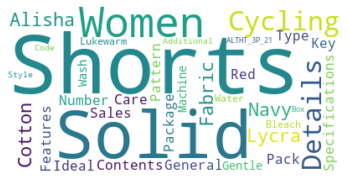

In [24]:
# Create and generate a word cloud image of just one string/description
wordcloud = WordCloud(background_color="white").generate(test_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
tags_counted_and_sorted = pd.DataFrame({'tag': all_tags}).groupby('tag').size().reset_index().sort_values(0, ascending=False)
tags_counted_and_sorted

,tag,0
1329,buy,10633
8119,rs,8567
6750,online,4970
10658,women,3934
3499,flipkart,3583
...,...,...
5070,kds,1
5068,kbsb,1
5065,kazamakraft,1
5064,kayara,1


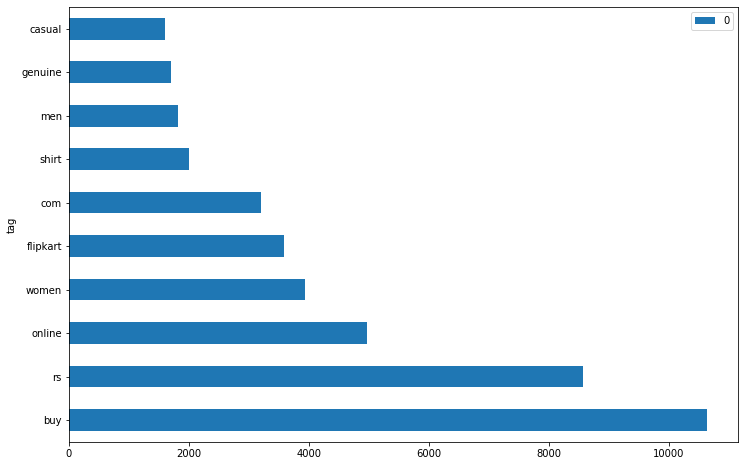

In [26]:
tags_counted_and_sorted[:10].plot.barh(x='tag', y=0, figsize=(12,8))

# Machine Learning - Multilabel Classification

---

## Baseline

The baseline is actually what I did in the function above. Tags are generated based on the occurunce of a word. The next step is to actually let the Machine Learning Multi-label classification Technique create these tags itself.

## Preprocessing

In [27]:
# there are a total of 19998 rows and 3 different columns. 
model_df.shape

(19998, 3)

In [28]:
target_variable = model_df['tags'][:1000]

In [29]:
mlb = MultiLabelBinarizer()
target_variable = mlb.fit_transform(target_variable)

In [30]:
mlb.classes_

array(['_brn', 'aa', 'aadivasi', ..., 'zoop', 'zoysia', 'zunia'],
      dtype=object)

#### There are a lot of non-existing words like 'xf', 'aaa', '_brn', we could take these probably out by using the NLTK library

In [31]:
pd.DataFrame(target_variable, columns=mlb.classes_)

,_brn,aa,aadivasi,aadyaa,aaliya,ab,abaya,abhira,abroad,abstract,...,zed,zipper,zircon,zirconia,ziva,zoe,zombiecon,zoop,zoysia,zunia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
model_df['description'][97]

'Colat COLAT_MW20 Sheen Analog Watch  - For Men, Women, Boys, Girls - Buy Colat COLAT_MW20 Sheen Analog Watch  - For Men, Women, Boys, Girls  COLAT_MW20 Online at Rs.849 in India Only at Flipkart.com. - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!'

### TfidfVectorizer

---

This method tokenizes documents/texts, learns the vocabulary and inverses the document frequency weightings and allows you to encode new documents. 

We will import this method from <b> sklearn.feature_extraction.text </b>. 
There are a lot of different parameters:

- <b>lowercase;</b> Convert all characters to lowercase, which in our case will be handy
- <b>stop_words;</b> If a string, it is passed to _check_stop_list and the appropriate stop list is returned
- <b>ngram_range;</b> The lower and upper boundary of the range of n-values for different n-grams to be extracted
- <b>max_features;</b> If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus


In [33]:
# Initialise the vectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', 
                             analyzer='word', 
                             ngram_range=(1,3), 
#                              max_features=1000,
                             stop_words='english',
                             token_pattern=r'\w{3,}'
                            )


# fit the independent features
independent_variable = vectorizer.fit_transform(model_df['description'][:1000])

print(independent_variable.shape)
print(target_variable.shape)

(1000, 36772)
(1000, 1803)


In [34]:
vectorizer.vocabulary_

{'key': 18735,
 'features': 14188,
 'alisha': 3262,
 'solid': 30626,
 'women': 35813,
 'cycling': 10767,
 'shorts': 29567,
 'cotton': 10078,
 'lycra': 20495,
 'navy': 22377,
 'red': 27144,
 'specifications': 30857,
 'details': 11519,
 'number': 22835,
 'contents': 9835,
 'sales': 28335,
 'package': 23718,
 'pack': 23632,
 'fabric': 13739,
 'type': 33630,
 'general': 15789,
 'pattern': 24228,
 'ideal': 17581,
 'care': 7304,
 'gentle': 15900,
 'machine': 20537,
 'wash': 34799,
 'lukewarm': 20473,
 'water': 34951,
 'bleach': 4981,
 'additional': 3006,
 'style': 31859,
 'code': 8596,
 'altht_3p_21': 3371,
 'box': 5668,
 'key features': 18736,
 'features alisha': 14207,
 'alisha solid': 3263,
 'solid women': 30675,
 'women cycling': 35979,
 'cycling shorts': 10770,
 'shorts cotton': 29578,
 'cotton lycra': 10145,
 'lycra navy': 20507,
 'navy red': 22394,
 'red navy': 27200,
 'navy specifications': 22397,
 'specifications alisha': 30879,
 'shorts shorts': 29596,
 'shorts details': 29580,
 'd

#### Train/test sets

In [35]:
independent_variable

<1000x36772 sparse matrix of type '<class 'numpy.float64'>'
	with 109774 stored elements in Compressed Sparse Row format>

In [36]:
# split the data into training en testing sets
X_train, X_test, y_train, y_test = train_test_split(
                                        independent_variable, 
                                        target_variable, 
                                        test_size=0.2, 
                                        random_state=42, 
                                        )

In [37]:
print(X_train.shape)
print(y_train.shape)

print('-------')

print(X_test.shape)
print(y_test.shape)

(800, 36772)
(800, 1803)
-------
(200, 36772)
(200, 1803)


# Model building

---

### Pipeline

In [38]:
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LinearSVC(
                                                class_weight='balanced',
                                                random_state=0,tol=1e-1,C=8.385), 
                                                n_jobs=-1)),
            ])

In [39]:
LogReg_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('clf',
                 OneVsRestClassifier(estimator=LinearSVC(C=8.385,
                                                         class_weight='balanced',
                                                         dual=True,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         loss='squared_hinge',
                                                         max_iter=1000,
                                                         multi_class='ovr',
                                                         penalty='l2',
                                                         random_state=0,
                                                         tol=0.1, verbose=0),
                                     n_jobs=-1))],
         verbose=False)

In [40]:
prediction = LogReg_pipeline.predict(X_test)

In [41]:
print('Test accuracy is {}'.format(accuracy_score(y_test, prediction)))

Test accuracy is 0.34


# Model testing

In [42]:
string_1 = ['Key Features of Alisha Solid Womens Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Womens Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Womens Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts']

In [43]:
model_string_1 = vectorizer.transform(string_1)
LogReg_pipeline.predict(model_string_1)

array([[0, 0, 0, ..., 0, 0, 0]])

### Predicted/generated tags for product description 1

In [44]:
predicted_tags = mlb.inverse_transform(LogReg_pipeline.predict(model_string_1))
predicted_tags

[('alisha',
  'cotton',
  'cycling',
  'lycra',
  'navy',
  'red',
  'shorts',
  'solid',
  'women')]

### Tags created by the baseline

In [45]:
baseline_tags = model_df['tags'][0]
baseline_tags

['shorts',
 'solid',
 'women',
 'cycling',
 'alisha',
 'cotton',
 'lycra',
 'navy',
 'red']

#### The machine learning model added one extra tag 'white', while our baseline didn't

---

# Add to new dataframe

In [46]:
submission_df = model_df.drop(columns=['tags','product_name'])

In [47]:
sample_df = submission_df[:1000]
sample_df.head(5)

,description
0,Key Features of Alisha Solid Women's Cycling S...
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,Key Features of AW Bellies Sandals Wedges Heel...
3,Key Features of Alisha Solid Women's Cycling S...
4,Specifications of Sicons All Purpose Arnica Do...


In [48]:
description_variable = vectorizer.fit_transform(sample_df['description'])

In [49]:
preds = mlb.inverse_transform(LogReg_pipeline.predict(description_variable))

In [50]:
sample_df['tags'] = preds

In [51]:
sample_df

,description,tags
0,Key Features of Alisha Solid Women's Cycling S...,"(alisha, cotton, cycling, lycra, navy, red, sh..."
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,"(avoid, bed, black, color, double, finish, mat..."
2,Key Features of AW Bellies Sandals Wedges Heel...,"(aw, bellies, casual, heel, material, pair, sh..."
3,Key Features of Alisha Solid Women's Cycling S...,"(alisha, black, cotton, cycling, lycra, red, s..."
4,Specifications of Sicons All Purpose Arnica Do...,"(arnica, brand, dog, ml, pet, purpose, quantit..."
...,...,...
996,Key Features of Mount Nano MN 110 250 ml Wheel...,()
997,Key Features of V4STYLES Loafers STEPpings Com...,"(back, blue, casual, comfortable, loafer, loaf..."
998,Key Features of Carmity RN-020 Maruti Ciaz Car...,"(car, carmity, ciaz, cover, grill, maruti, mod..."
999,Key Features of PHOCOS CX10 MPPT Solar Charge ...,()
